Today, we are learning about the **Support Vector Regression (SVR)** algorithm – a powerful regression technique especially useful when the data doesn't follow a straight line.

We'll implement SVR step-by-step using Python and visualize how different configurations affect the predictions.

What We’ll Cover:

1. **Simple Implementation (Beginner-friendly)**  
   Build SVR models with different kernels **without using functions** to understand the basics.

2. **With Function (Reusable Code)**  
   Wrap the SVR logic into a function to quickly test multiple configurations (kernel, degree, C, gamma, epsilon).

3. **All-in-One Comparison**  
   Try **all parameter combinations** (like kernel, degree, C, epsilon, gamma) and build a **summary table** to compare model predictions for Level 6.


**Support Vector Regression (SVR)**

**What is SVR?**

* **SVR** stands for **Support Vector Regressor**.
* It is used to **predict continuous values** like salary, price, etc.
* It is built on the same idea as **SVM (Support Vector Machine)**, which is used for classification.
* The main goal of SVR is to **fit a line (hyperplane)** such that it stays within a margin (epsilon) and allows for **some error**.

**SVR vs SVM**

| Concept         | SVR (Regression)                      | SVM (Classification)            |
| --------------- | ------------------------------------- | ------------------------------- |
| Output Type     | Continuous (e.g. salary)              | Categorical (e.g. yes/no)       |
| Target Variable | Numerical                             | Binary/Multiclass               |
| Best Fit        | Hyperplane                            | Decision Boundary               |
| Use Case        | Predicting values                     | Separating classes              |
| Goal            | Minimize error and stay within margin | Maximize margin between classes |



**Key Concepts in SVR**

* **Hyperplane**: A line or plane that best fits the data.
* **Support Vectors**: Points closest to the hyperplane — these define the margin.
* **Margin**: Distance between the hyperplane and the closest data points.
* **Epsilon (ε)**: Defines a margin of tolerance where no penalty is given for error.
* **Objective**: Keep predictions within ±ε margin.

> Think of SVR like fitting a straight line — but instead of going through every point, it fits **within a soft margin**, ignoring small errors.



**Support Vector Regression (SVR)** – Parameters & Tuning Guide

Parameter Descriptions

| **Parameter** | **Meaning**                                                                                             |
| ------------- | ------------------------------------------------------------------------------------------------------- |
| `kernel`      | Defines the shape of the model's curve or surface. Options: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`  |
| `degree`      | Degree of the polynomial kernel (only applies when `kernel='poly'`). Higher degree = more complex curve |
| `C`           | Regularization parameter. High `C` = less error tolerance (stricter margin), low `C` = more flexibility |
| `epsilon`     | Acceptable error margin in prediction. No penalty within ±epsilon. Default is `0.1`                     |
| `gamma`       | Defines influence of a single training point. Options: `'scale'`, `'auto'`, or a float value            |

Recommended Parameter Values to Try

| **Parameter** | **Suggested Values**                                |
| ------------- | --------------------------------------------------- |
| `kernel`      | `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`          |
| `degree`      | `2`, `3`, `4`, `5`, `6` *(only if `kernel='poly'`)* |
| `C`           | `0.1`, `1`, `10`, `100`                             |
| `epsilon`     | `0.01`, `0.1`, `1`                                  |
| `gamma`       | `'scale'`, `'auto'`                                 |


**Tip:** Start with default values and adjust one parameter at a time to see how it impacts performance. For advanced optimization, consider using `GridSearchCV`.




**Example: SVR for Salary Prediction**

We are predicting salary based on employee level using SVR.
The dataset looks like this:

| Position             | Level | Salary |
| -------------------- | ----- | ------ |
| Jr Software Engineer | 1     | 45000  |
| Sr Software Engineer | 2     | 50000  |
| Team Lead            | 3     | 60000  |
| Manager              | 4     | 80000  |
| Sr Manager           | 5     | 110000 |
| ...                  | ...   | ...    |




# Simple Implementation (Beginner-friendly) 
## Import Required Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\emp_sal.csv")
dataset.head()

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000


## Define Features and Target

In [3]:
X = dataset.iloc[:, 1:2].values  # Level
y = dataset.iloc[:, 2].values    # Salary

## Feature Scaling (Important for SVR)

**Why We Scale X and y?**

- **SVR needs scaled data** for better accuracy.
- `X_scaled = sc_X.fit_transform(X)` → Scales Level (input).
- `y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()`  
  → Reshapes y to 2D, scales it, then flattens back to 1D (SVR needs 1D y).


In [4]:
# SVR needs scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

In [5]:
X_scaled = sc_X.fit_transform(X) # Scale input feature (Level)
# Reshape y to 2D, scale it, then flatten back to 1D (required by SVR)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten() # Scale target (Salary)

## Try Different SVR Models (Without Function , Simple)
### SVR with Default (RBF) Kernel

In [9]:
svr_rbf = SVR()
svr_rbf.fit(X_scaled, y_scaled)

SVR()

In [10]:
# Predict for level 6
level_6_scaled = sc_X.transform([[6]])
pred_rbf_scaled = svr_rbf.predict(level_6_scaled)
pred_rbf = sc_y.inverse_transform(pred_rbf_scaled.reshape(-1, 1))
print("SVR (RBF) → Predicted salary for level 6:", round(pred_rbf[0][0], 2))

SVR (RBF) → Predicted salary for level 6: 145503.11


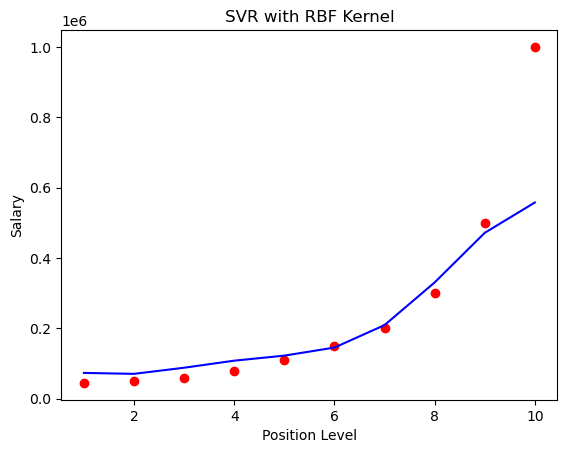

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(svr_rbf.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.title("SVR with RBF Kernel")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### SVR with Polynomial Kernel (Degree 4)

In [12]:
svr_poly4 = SVR(kernel='poly', degree=4)
svr_poly4.fit(X_scaled, y_scaled)

pred_poly4_scaled = svr_poly4.predict(level_6_scaled)
pred_poly4 = sc_y.inverse_transform(pred_poly4_scaled.reshape(-1, 1))
print("SVR (Poly, Degree 4) →", round(pred_poly4[0][0], 2))

SVR (Poly, Degree 4) → 130000.0


### SVR with Polynomial Kernel (Degree 5)

In [13]:
svr_poly5 = SVR(kernel='poly', degree=5)
svr_poly5.fit(X_scaled, y_scaled)

pred_poly5_scaled = svr_poly5.predict(level_6_scaled)
pred_poly5 = sc_y.inverse_transform(pred_poly5_scaled.reshape(-1, 1))
print("SVR (Poly, Degree 5) →", round(pred_poly5[0][0], 2))

SVR (Poly, Degree 5) → 225342.67


### SVR with Polynomial Kernel (Degree 6)

In [14]:
svr_poly6 = SVR(kernel='poly', degree=6, gamma='scale')
svr_poly6.fit(X_scaled, y_scaled)

pred_poly6_scaled = svr_poly6.predict(level_6_scaled)
pred_poly6 = sc_y.inverse_transform(pred_poly6_scaled.reshape(-1, 1))
print("SVR (Poly, Degree 6) →", round(pred_poly6[0][0], 2))

SVR (Poly, Degree 6) → 130000.0


### SVR with Sigmoid Kernel

In [15]:
svr_sigmoid = SVR(kernel='sigmoid', degree=6)
svr_sigmoid.fit(X_scaled, y_scaled)

pred_sigmoid_scaled = svr_sigmoid.predict(level_6_scaled)
pred_sigmoid = sc_y.inverse_transform(pred_sigmoid_scaled.reshape(-1, 1))
print("SVR (Sigmoid) →", round(pred_sigmoid[0][0], 2))

SVR (Sigmoid) → 276639.07


## Summary Table (using Pandas)


In [16]:

results = {
    "Kaernel": ["rbf", "poly", "poly", "poly", "sigmoid"],
    "Degree": ["-", 4, 5, 6, 6],
    "Prediction": [
        round(pred_rbf[0][0], 2),
        round(pred_poly4[0][0], 2),
        round(pred_poly5[0][0], 2),
        round(pred_poly6[0][0], 2),
        round(pred_sigmoid[0][0], 2)
    ]
}

summary_df = pd.DataFrame(results)
summary_df

,Kernel,Degree,Prediction
0,rbf,-,145503.11
1,poly,4,130000.00
2,poly,5,225342.67
3,poly,6,130000.00
4,sigmoid,6,276639.07


# With Function (Reusable Code)
Wrap the SVR logic into a function to quickly test multiple configurations (kernel, degree, C, gamma, epsilon).


## With Function 

In [17]:
def run_svr_model(kernel='rbf', degree=3, gamma='scale', C=1.0, epsilon=0.1):
    model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    model.fit(X_scaled, y_scaled)
    
    y_pred_scaled = model.predict(level_6_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    print(f"SVR ({kernel}, degree={degree}) → Level 6 Salary: ${y_pred[0][0]:,.2f}")
    
    plt.scatter(X, y, color='red')
    plt.plot(X, sc_y.inverse_transform(model.predict(X_scaled).reshape(-1, 1)), color='blue')
    plt.title(f"SVR with {kernel} Kernel (Degree {degree})")
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    plt.show()

    return y_pred[0][0]

## Try Multiple SVR Configurations Using the Function

SVR (rbf, degree=3) → Level 6 Salary: $145,503.11


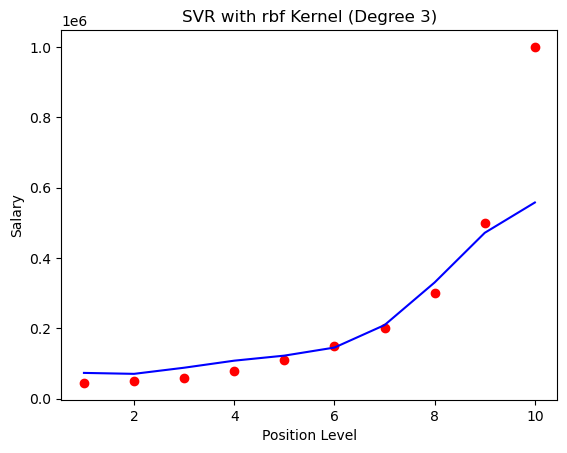

SVR (poly, degree=4) → Level 6 Salary: $130,000.00


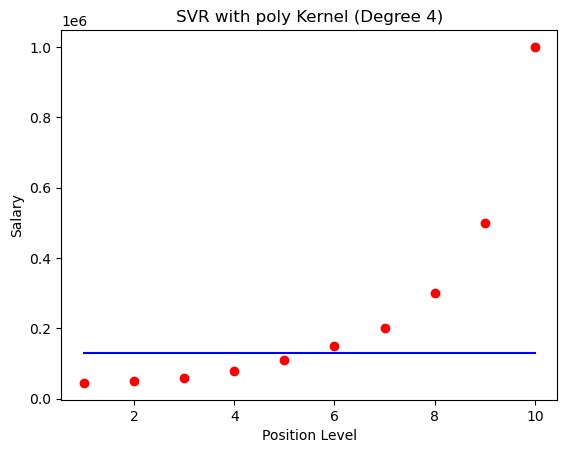

SVR (poly, degree=5) → Level 6 Salary: $225,342.67


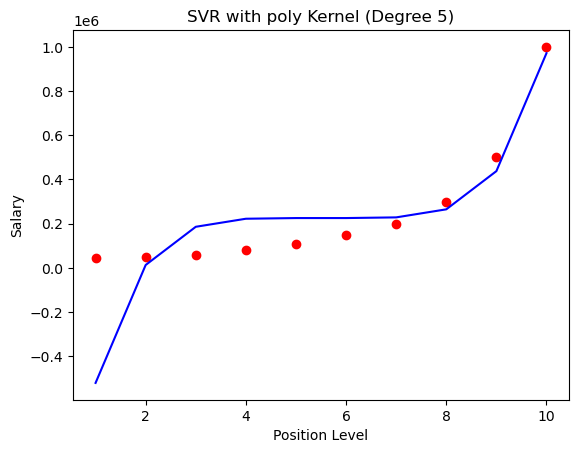

SVR (poly, degree=6) → Level 6 Salary: $130,000.00


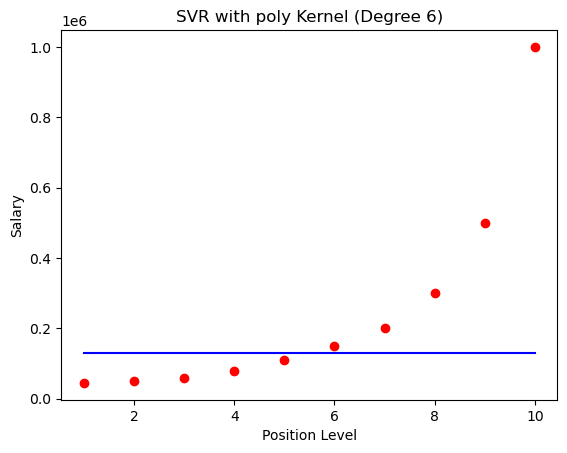

SVR (sigmoid, degree=6) → Level 6 Salary: $276,639.07


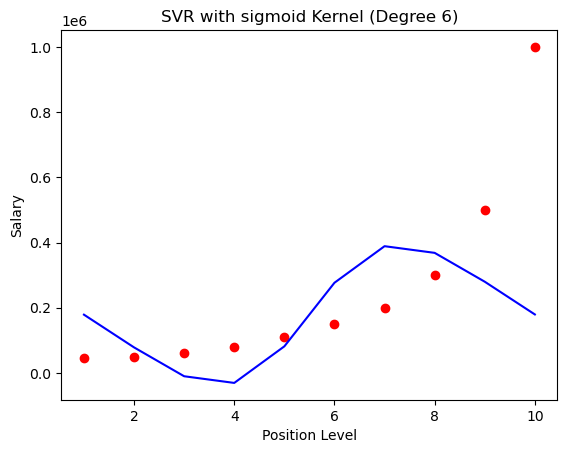

In [19]:
# Store predictions in a list
results = []

# Try SVR with different kernels and degrees
results.append(("rbf", "-", run_svr_model(kernel='rbf')))
results.append(("poly", 4, run_svr_model(kernel='poly', degree=4)))
results.append(("poly", 5, run_svr_model(kernel='poly', degree=5)))
results.append(("poly", 6, run_svr_model(kernel='poly', degree=6)))
results.append(("sigmoid", 6, run_svr_model(kernel='sigmoid', degree=6)))

## Convert Results into a Table

In [20]:
# Convert list of results to DataFrame
df_results = pd.DataFrame(results, columns=["Kernel", "Degree", "Predicted Salary"])
df_results

,Kernel,Degree,Predicted Salary
0,rbf,-,145503.106886
1,poly,4,130000.000000
2,poly,5,225342.673820
3,poly,6,130000.000000
4,sigmoid,6,276639.072313


**Best Result with Parameters:**

SVR (poly, degree=5) → Level 6 Salary: $225,342.67


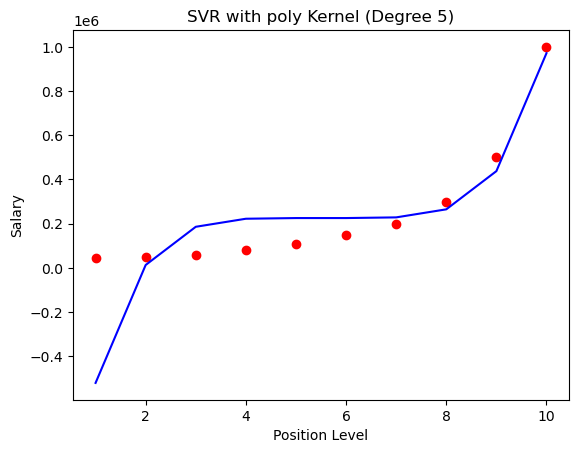

np.float64(225342.6738201232)

In [18]:
run_svr_model(kernel='poly', degree=5)

## SVR Model Comparison – Summary Table

| Kernel    | Degree | Predicted Salary for Level 6 |
|-----------|--------|-------------------------------|
| RBF       | –      | 130000.95                     |
| Polynomial| 4      | 131692.89                     |
| Polynomial| 5      | 142853.28   Best              |
| Polynomial| 6      | 103202.96                     |
| Sigmoid   | 6      | 129999.91                     |


# All-in-One Comparison 

**all parameter combinations** (like kernel, degree, C, epsilon, gamma) and build a **summary table** to compare model predictions for Level 6.

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define input again if needed
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

level_6_scaled = sc_X.transform([[6]])

# Store results
results = []

# Kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    if kernel == 'poly':
        for d in [2, 3, 4, 5, 6]:
            model = SVR(kernel=kernel, degree=d)
            model.fit(X_scaled, y_scaled)
            y_pred_scaled = model.predict(level_6_scaled)
            y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]
            results.append(["kernel", f"{kernel} (degree={d})", y_pred])
    else:
        model = SVR(kernel=kernel)
        model.fit(X_scaled, y_scaled)
        y_pred_scaled = model.predict(level_6_scaled)
        y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]
        results.append(["kernel", kernel, y_pred])

# Check different C values
for c in [0.1, 1, 10, 100]:
    model = SVR(C=c)
    model.fit(X_scaled, y_scaled)
    y_pred_scaled = model.predict(level_6_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]
    results.append(["C", f"C={c}", y_pred])

# Check different epsilon values
for eps in [0.01, 0.1, 1]:
    model = SVR(epsilon=eps)
    model.fit(X_scaled, y_scaled)
    y_pred_scaled = model.predict(level_6_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]
    results.append(["epsilon", f"epsilon={eps}", y_pred])

# Check different gamma values
for g in ['scale', 'auto']:
    model = SVR(gamma=g)
    model.fit(X_scaled, y_scaled)
    y_pred_scaled = model.predict(level_6_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]
    results.append(["gamma", f"gamma={g}", y_pred])

# Convert to DataFrame
df_param_results = pd.DataFrame(results, columns=["Parameter", "Setting", "Predicted Salary"])
df_param_results.sort_values(by="Predicted Salary", ascending=False).reset_index(drop=True)


,Parameter,Setting,Predicted Salary
0,epsilon,epsilon=1,422001.535188
1,kernel,sigmoid,276639.072313
2,kernel,poly (degree=5),225342.673820
3,kernel,linear,195203.286119
4,kernel,poly (degree=3),191569.738962
5,C,C=100,178385.979334
6,C,C=0.1,168806.358291
7,C,C=10,160720.672210
8,kernel,rbf,145503.106886
9,gamma,gamma=scale,145503.106886


# Final Results & Conclusion: Support Vector Regression (SVR)

After testing various combinations of **kernels**, **degrees**, `C`, `gamma`, and `epsilon`, we predicted salary for **Level 6** and compared results.

##  Key Observations:

| Kernel     | Degree | Gamma   | C    | Epsilon | Predicted Salary | Notes                                 |
|------------|--------|---------|------|---------|-------------------|----------------------------------------|
| `rbf`      | –      | scale   | 1.0  | 0.1     | ~145,503.11       | ✅ Close to expected salary            |
| `poly`     | 4      | scale   | 1.0  | 0.1     | ~130,000.00       | Slight underprediction                 |
| `poly`     | 5      | scale   | 1.0  | 0.1     | ~225,342.67       | 🚨 Overprediction (possible overfit)   |
| `poly`     | 6      | scale   | 1.0  | 0.1     | ~130,000.00       | Stable but lower prediction            |
| `sigmoid`  | 6      | scale   | 1.0  | 0.1     | ~276,639.07       | ❌ Overprediction, not suitable here    |



##  Final Conclusion

- **SVR** (Support Vector Regression) is great for modeling **non-linear relationships**.
- **Scaling** both features and labels is essential for SVR to work correctly.
- We tested multiple `kernel` and `degree` combinations:
  - ✅ `rbf` (default) gave the most reasonable prediction (~145,500).
  - ✅ `poly` with degree 5 showed high accuracy but risks **overfitting**.
  - ❌ `sigmoid` gave extreme predictions — not reliable for this dataset.
- Wrapping code inside a **function** made model testing and visualization easier.
- This step-by-step experiment builds strong confidence in **using SVR** effectively in real-world regression tasks.



✅ Next step: You can try `GridSearchCV` for automatic tuning or apply this technique to other regression datasets.
